# Notebook Purpose
This notebook contains a handful of basic visualization about our datasette requests data. 

In [8]:
import pandas as pd

from usage_metrics.resources.postgres import get_engine

%config InlineBackend.figure_format = 'retina'

In [2]:
engine = get_engine()

with engine.connect() as con:
    logs = pd.read_sql_table("data_request_logs", con)

logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   request_method                      4044 non-null   object             
 1   request_url                         4044 non-null   object             
 2   request_size                        4044 non-null   int64              
 3   status                              4044 non-null   int64              
 4   response_size                       4041 non-null   float64            
 5   user_agent                          4039 non-null   object             
 6   remote_ip                           4044 non-null   object             
 7   server_ip                           4044 non-null   object             
 8   referer                             764 non-null    object             
 9   latency                             4044 

## Request Volume
Number of requests for ferc1 and pudl tables and downloads per week.

<AxesSubplot:xlabel='timestamp'>

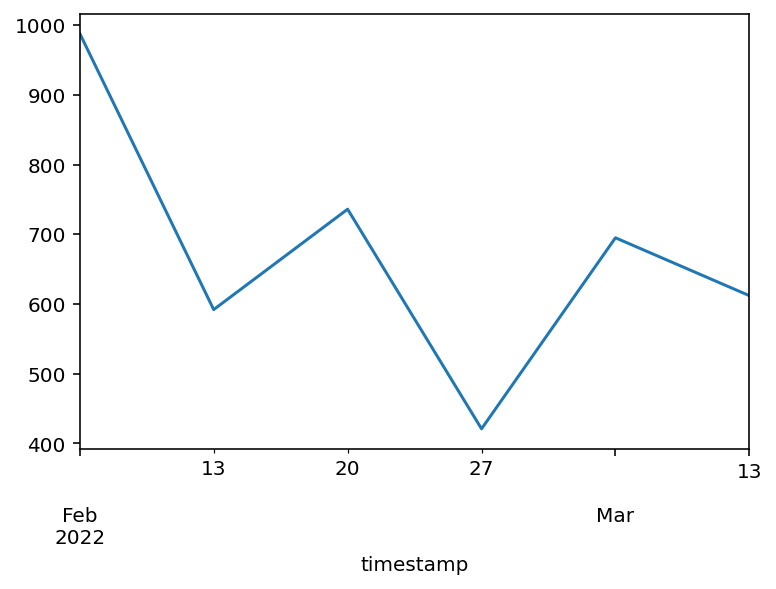

In [3]:
logs.set_index("timestamp").resample("1W").count().request_url_path.plot()

## Top Data Requests
The top datasette path requests. This includes json, csv and db downloads.

### Number of top data requests

<AxesSubplot:>

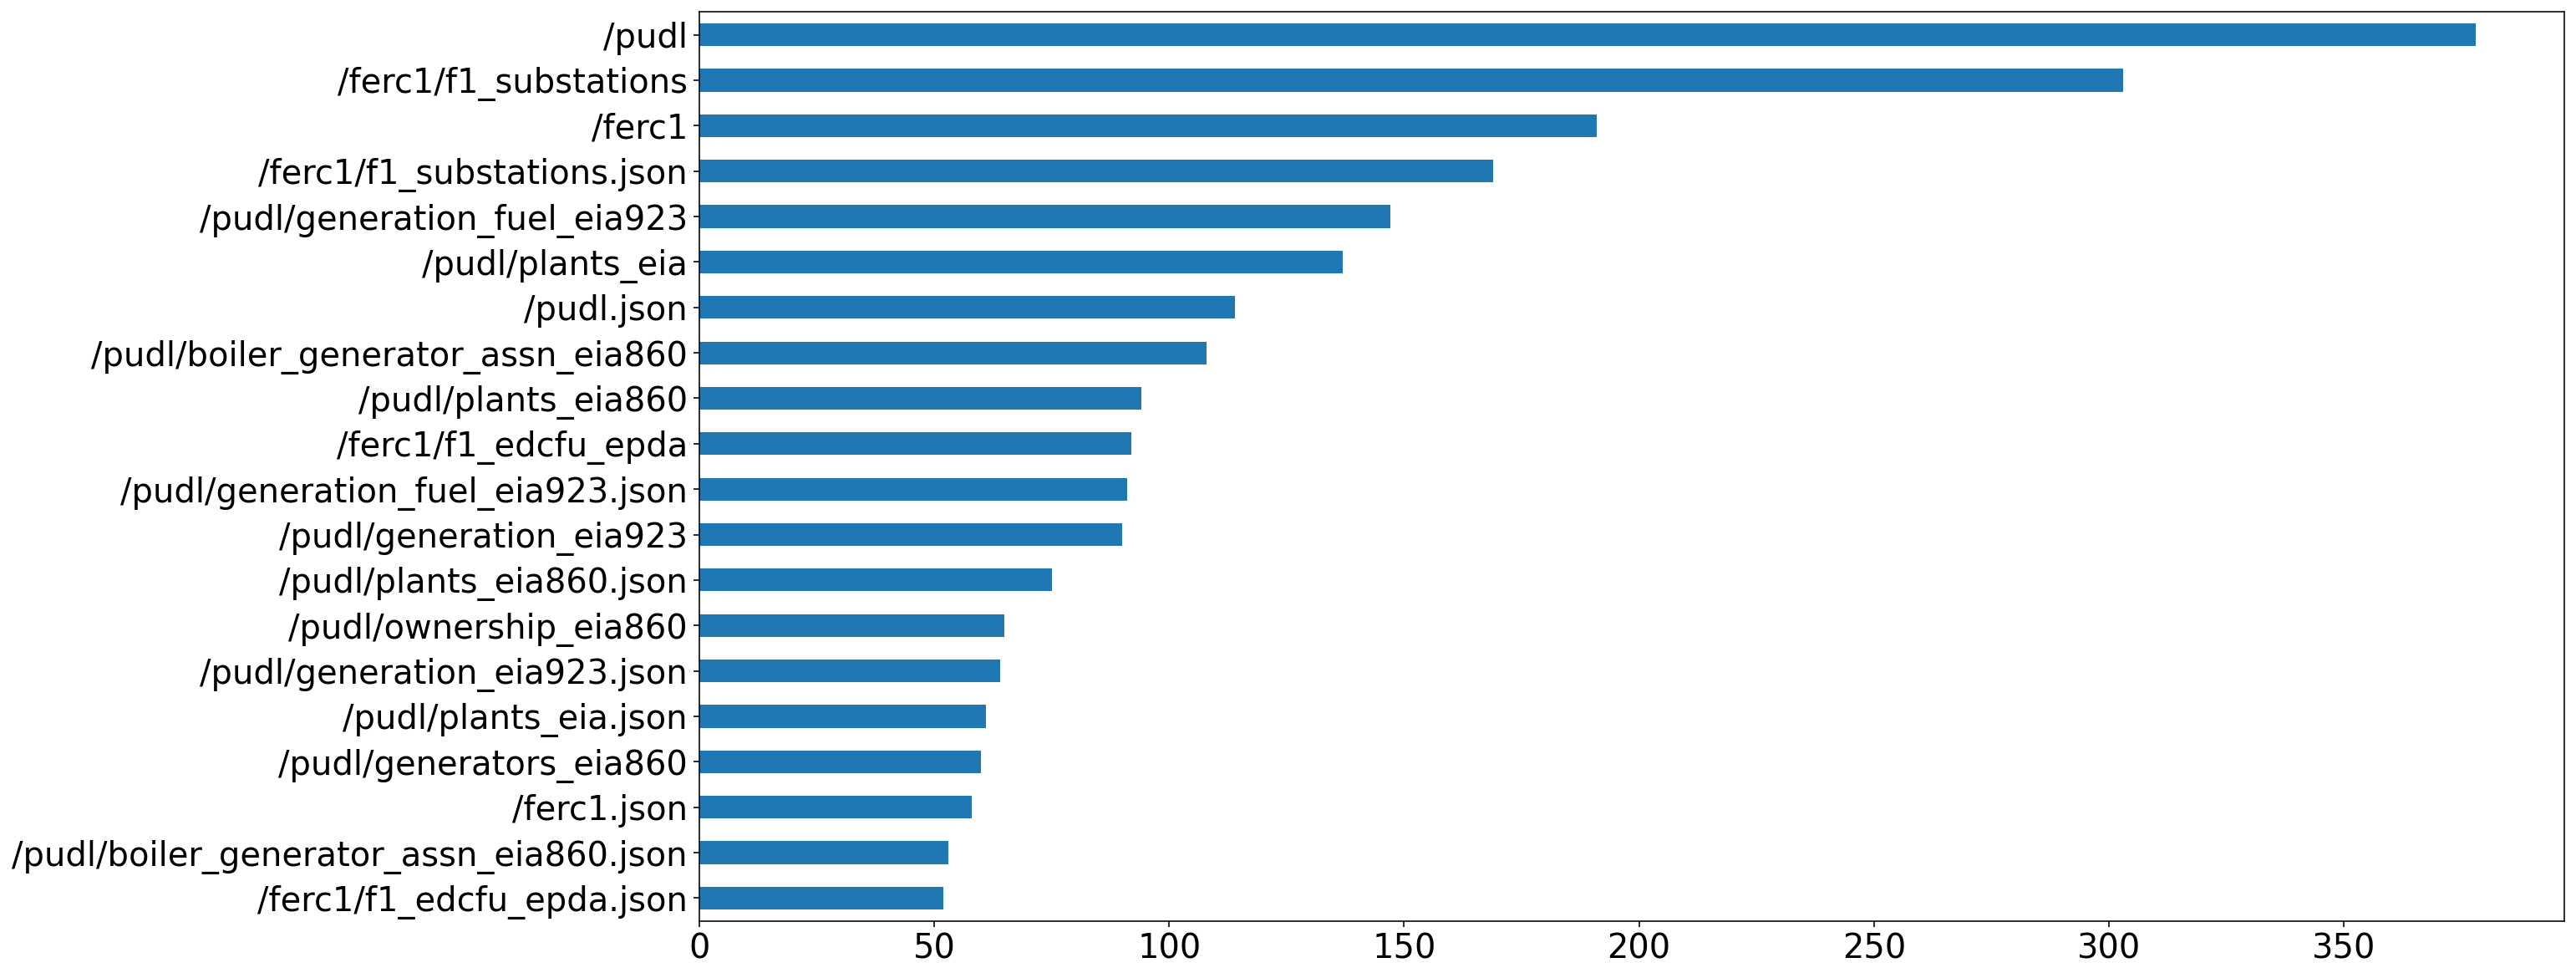

In [4]:
top_n = 20

logs.request_url_path.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20)

### Percent of all requests

This chart shows 59.39663699307616 % of all data requests.


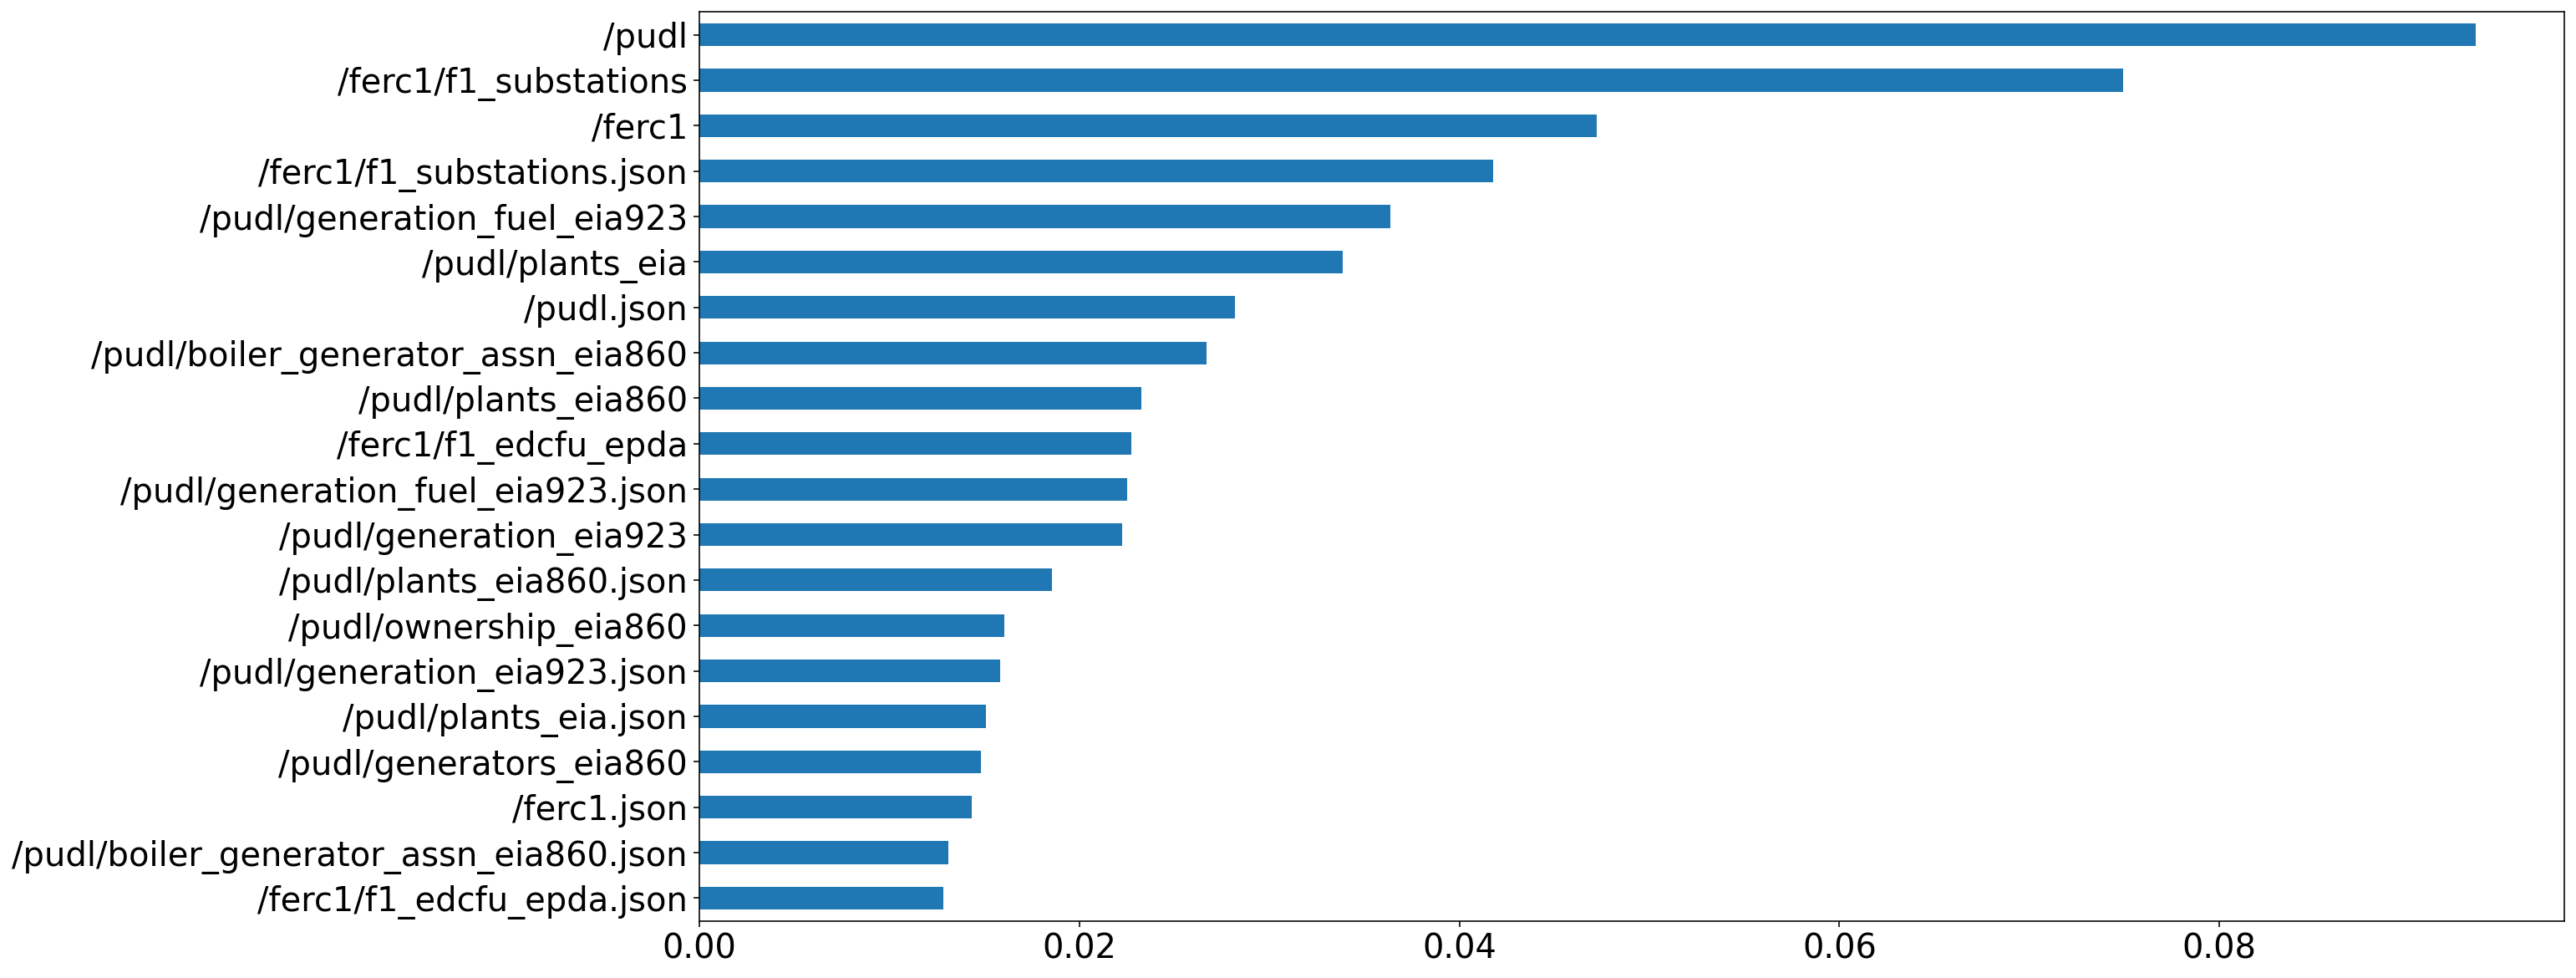

In [12]:
top_n = 20

top_paths = logs.request_url_path.value_counts(normalize=True).head(top_n)

top_paths.sort_values().plot.barh(figsize=(20,10), fontsize=20)

print(f"This chart shows {top_paths.sum() * 100} % of all data requests.")

## Top Organizations
Most organizations are generic internet providers however universities often have their own network set up. Unfortunately ipinfo charges for organization type so we have do some simple string filtering for now.  

<AxesSubplot:>

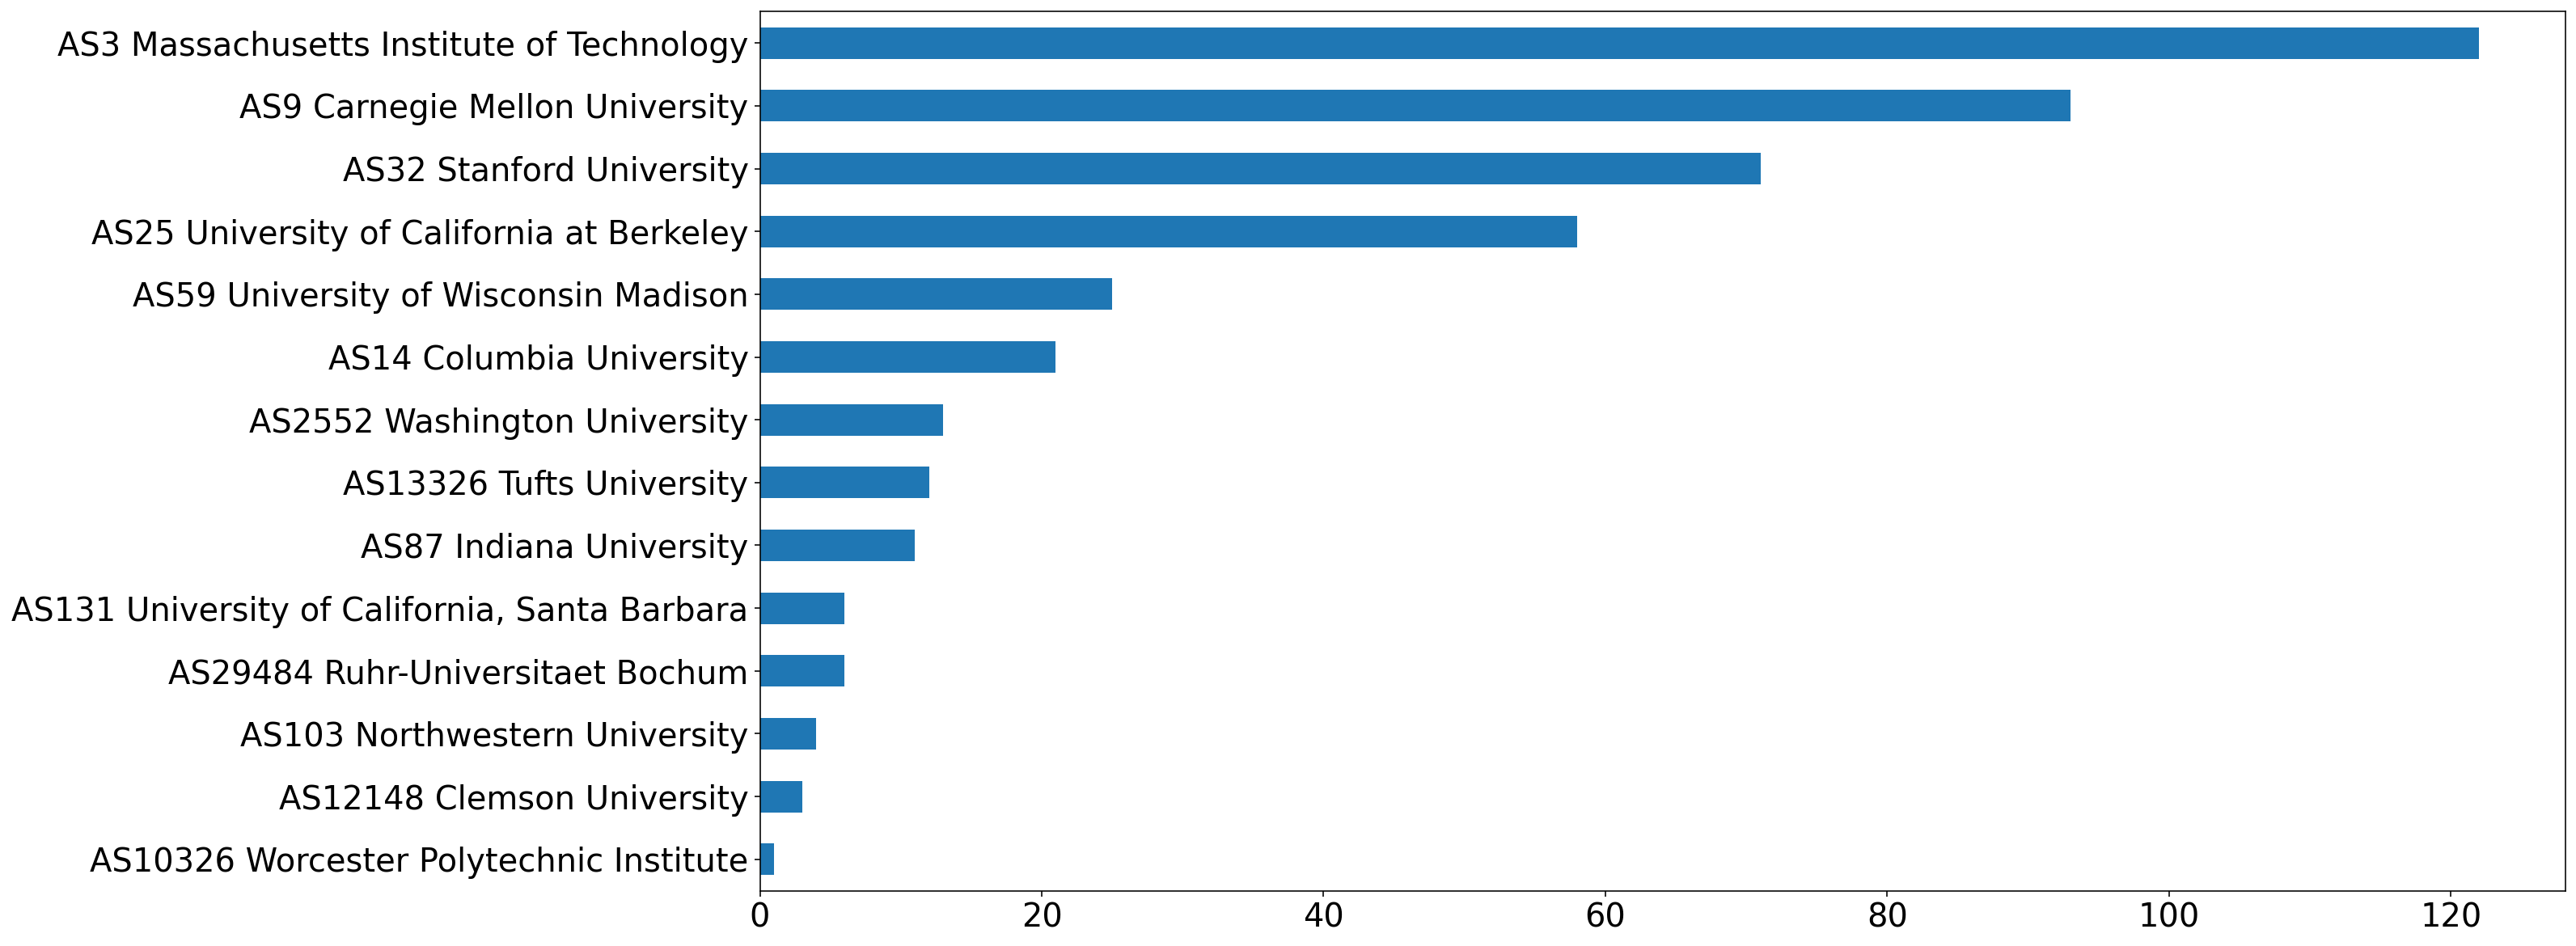

In [13]:
university_substrings = ["Universitaet", "University", "College", "Institute"]

is_uni = logs.remote_ip_org.str.contains("|".join(university_substrings))

logs[is_uni].remote_ip_org.value_counts().sort_values().plot.barh(figsize=(20,10), fontsize=20)

## Top Cities

<AxesSubplot:>

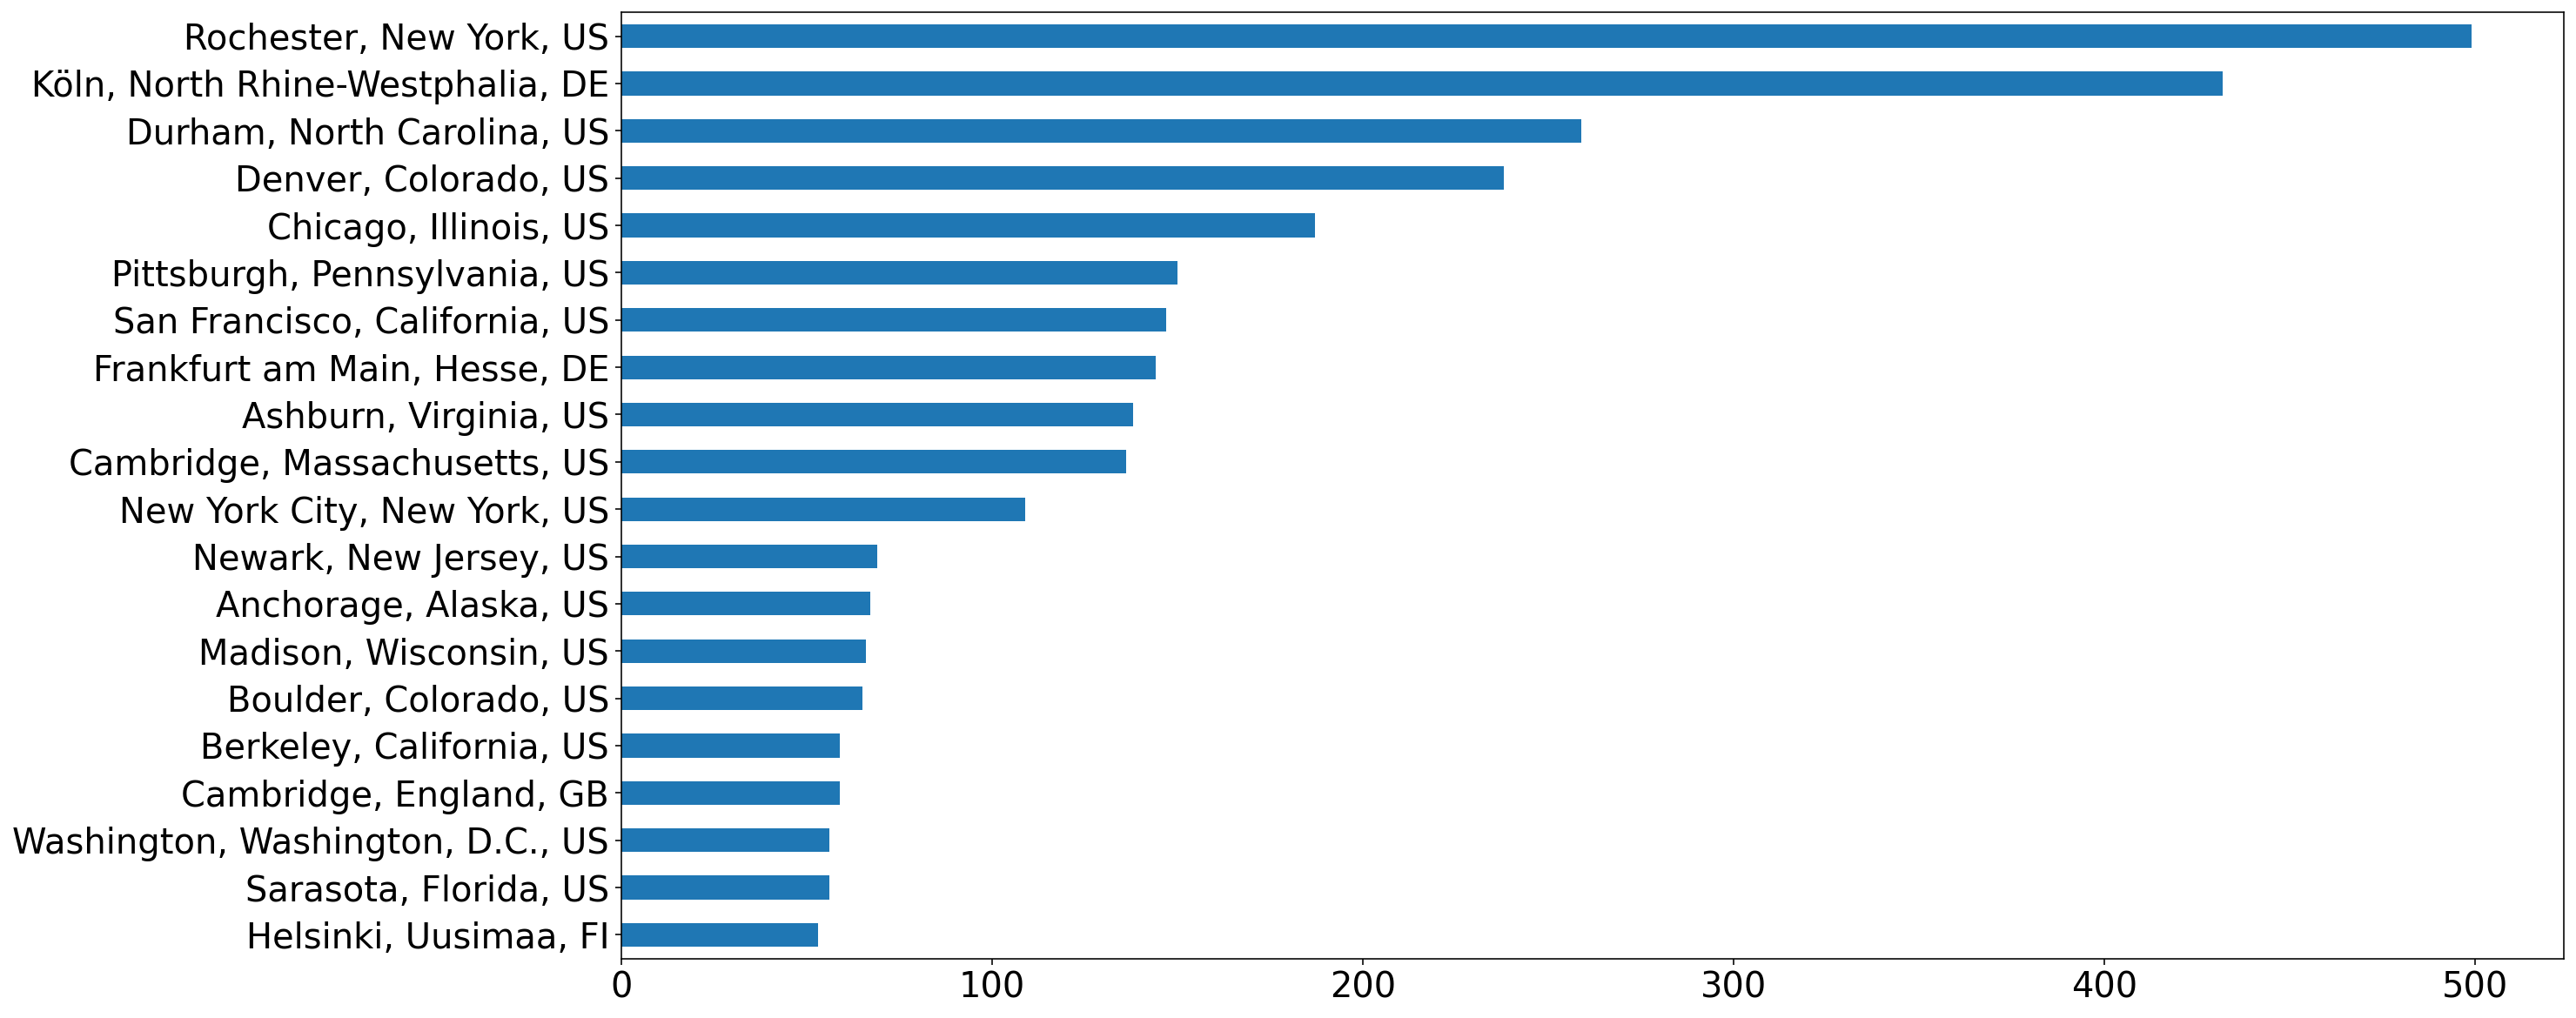

In [7]:
top_n = 20

full_location = logs.remote_ip_city + ", " + logs.remote_ip_region + ", " + logs.remote_ip_country

full_location.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20)